In [2]:
%load_ext autoreload
%autoreload 2

In [2]:
import json, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from training_utils import *
from data_utils import *

Exception: Please set environment variable: fairness_data to point towards the data directory

In [55]:
def get_experiment_group_tpr(data_dir, threshold = 0.05):
    train_out = pd.read_pickle(os.path.join(data_dir, 'train_out'))
    test_out = pd.read_pickle(os.path.join(data_dir, 'test_out'))
    train_col_rate = get_group_tpr_rates(train_out)
    test_col_rate = get_group_tpr_rates(test_out)
    overall_train = tpr(train_out, "label")
    overall_test = tpr(test_out, "label")
    
    train_diffs = {}
    for key, val in train_col_rate.items():
        train_diffs[key] = max(abs(val - overall_train) - 0.05, 0)
    
    test_diffs = {}
    for key, val in test_col_rate.items():
        test_diffs[key] = max(abs(val - overall_test) - 0.05, 0)
    
    return train_diffs, test_diffs
def get_group_tpr_rates(df):
    overall_tpr_rate = tpr(df, "label")
    columns = list(df.keys())
    col_rates = {}
    for col in columns: 
        if col in ['label', 'predictions', 'predicted_class']:
            continue 
        col_rates[col] = tpr(df[df[col] == 1], "label")
    return col_rates
    

## Generalization 

How well does constraint satisfaction generalize?

In [56]:
baseline_results_dir="/Users/neelguha/Dropbox/NeelResearch/fairness/code/results/rate_constraints/adult-income/baseline/"
baseline_train_diffs, baseline_test_diffs = get_experiment_group_tpr(baseline_results_dir)

In [57]:
agr_results_dir="/Users/neelguha/Dropbox/NeelResearch/fairness/code/results/rate_constraints/adult-income/age_gender_race/"
agr_train_diffs, agr_test_diffs = get_experiment_group_tpr(agr_results_dir)

In [58]:
gr_results_dir="/Users/neelguha/Dropbox/NeelResearch/fairness/code/results/rate_constraints/adult-income/gender_race/"
gr_train_diffs, gr_test_diffs = get_experiment_group_tpr(gr_results_dir)

In [59]:
r_results_dir="/Users/neelguha/Dropbox/NeelResearch/fairness/code/results/rate_constraints/adult-income/race/"
r_train_diffs, r_test_diffs = get_experiment_group_tpr(r_results_dir)

# Mean Train/Test Violations across all groups

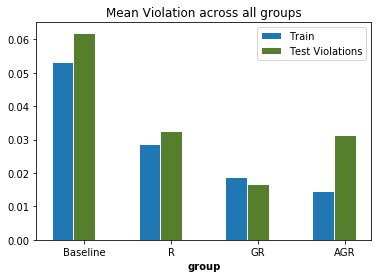

In [60]:
# get train violations 
labels = ["Baseline","R", "GR", "AGR"]
train_violations = []
train_exp = [baseline_train_diffs, r_train_diffs, gr_train_diffs, agr_train_diffs]
for exp in train_exp:
    violation_mean = np.mean(list(exp.values()))
    train_violations.append(violation_mean)
    
test_violations = []
test_exp = [baseline_test_diffs, r_test_diffs, gr_test_diffs, agr_test_diffs]
for exp in test_exp:
    violation_mean = np.mean(list(exp.values()))
    test_violations.append(violation_mean)

# set width of bar
barWidth = 0.25
 
# Set position of bar on X axis
r1 = np.arange(len(train_violations))
r2 = [x + barWidth for x in r1]
#r3 = [x + barWidth for x in r2]
#r4 = [x + barWidth for x in r3]
 
# Make the plot
plt.bar(r1, train_violations, width=barWidth, edgecolor='white', label='Train')
plt.bar(r2, test_violations, color='#557f2d', width=barWidth, edgecolor='white', label='Test Violations')
#plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='var3')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(train_violations))], labels)
 
# Create legend & Show graphic
plt.title("Mean Violation across all groups")
plt.legend()
plt.show()


## Max Train/Test Violations across all groups

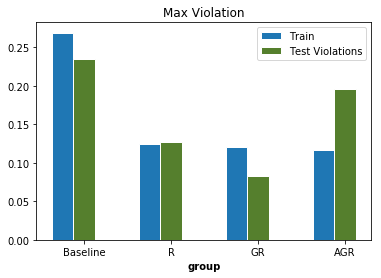

In [63]:
# get train violations 
labels = ["Baseline","R", "GR", "AGR"]
train_violations = []
train_exp = [baseline_train_diffs, r_train_diffs, gr_train_diffs, agr_train_diffs]
for exp in train_exp:
    violation_mean = np.max(list(exp.values()))
    train_violations.append(violation_mean)
    
test_violations = []
test_exp = [baseline_test_diffs, r_test_diffs, gr_test_diffs, agr_test_diffs]
for exp in test_exp:
    violation_mean = np.max(list(exp.values()))
    test_violations.append(violation_mean)

# set width of bar
barWidth = 0.25
 
# Set position of bar on X axis
r1 = np.arange(len(train_violations))
r2 = [x + barWidth for x in r1]
#r3 = [x + barWidth for x in r2]
#r4 = [x + barWidth for x in r3]
 
# Make the plot
plt.bar(r1, train_violations, width=barWidth, edgecolor='white', label='Train')
plt.bar(r2, test_violations, color='#557f2d', width=barWidth, edgecolor='white', label='Test Violations')
#plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='var3')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(train_violations))], labels)
 
# Create legend & Show graphic
plt.title("Max Violation")
plt.legend()
plt.show()


In [64]:
r_train_diffs

{'race_Amer-Indian-Eskimo': 0.007989343762842036,
 'race_Asian-Pac-Islander': 0,
 'race_Black': 0.011219317923048797,
 'race_Other': 0.12423287845938018,
 'race_White': 0}